In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 534.4 kB/s eta 0:00:0000:0100:02
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from PIL import Image
import matplotlib.pyplot as plt

Part 1: Using PIL

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Size: (736, 1104)
Mode: RGB


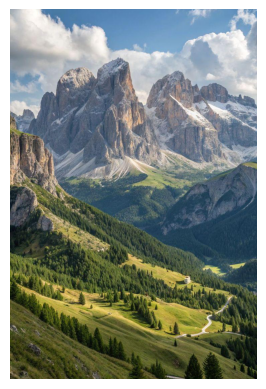

In [2]:
img_pil = Image.open("/Users/230150/Downloads/nature.jpg")

print(type(img_pil))
print("Size:", img_pil.size)
print("Mode:", img_pil.mode)

plt.imshow(img_pil)
plt.axis("off")
plt.show()

Task 1.1: PIL → NumPy Conversion

In [4]:
import numpy as np

img_array = np.array(img_pil)

print(f"Array shape: {img_array.shape}")  
print(f"Data type: {img_array.dtype}")
print(f"Min pixel value: {img_array.min()}")
print(f"Max pixel value: {img_array.max()}")

Array shape: (1104, 736, 3)
Data type: uint8
Min pixel value: 0
Max pixel value: 255


 Part 2: Matplotlib Image Reading

Image shape: (1104, 736, 3)
Data type: uint8


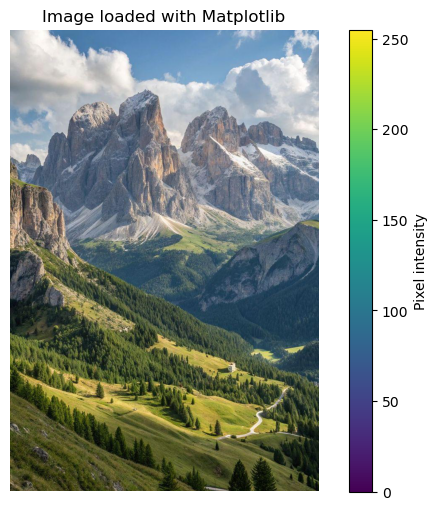

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_mpl = mpimg.imread("/Users/230150/Downloads/nature.jpg")

print(f"Image shape: {img_mpl.shape}")
print(f"Data type: {img_mpl.dtype}")

plt.figure(figsize=(8, 6))
plt.imshow(img_mpl)
plt.title("Image loaded with Matplotlib")
plt.axis('off')
plt.colorbar(label='Pixel intensity')
plt.show()

Why does Matplotlib treat images as NumPy arrays? Write your answer below.

Answer: Matplotlib treats images as NumPy arrays because it is designed for scientific computing and data visualization. NumPy arrays provide efficient numerical operations, easy manipulation of pixel values, and seamless integration with other scientific Python libraries. This allows for fast mathematical operations on images (like scaling, filtering, transformations) and makes it easier to work with image data in the context of scientific analysis and plotting.

Part 3: scikit-image

In [6]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt

Original dtype: uint8
dtype: float64
min pixel value: 0.0
max pixel value: 1.0


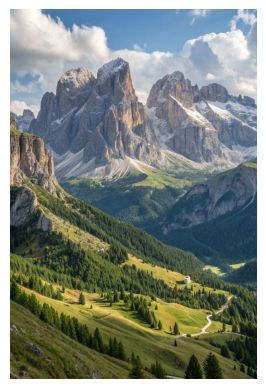

In [7]:
img_sk = io.imread("/Users/230150/Downloads/nature.jpg")

img_sk_float = img_as_float(img_sk)

print(f"Original dtype: {img_sk.dtype}")
print("dtype:", img_sk_float.dtype)
print("min pixel value:", img_sk_float.min())
print("max pixel value:", img_sk_float.max())

plt.imshow(img_sk_float)
plt.axis("off")
plt.show()

Why is using astype(float) discouraged compared to img_as_float? Explain briefly.

Using astype(float) is discouraged because it simply changes the data type without rescaling the values. For example, if you have uint8 values (0-255) and use astype(float), you'll get float values still in the range 0-255, not the normalized 0-1 range that most image processing algorithms expect. In contrast, img_as_float properly rescales the values to the [0, 1] range based on the input data type, ensuring correct normalization. This prevents numerical issues and ensures compatibility with scikit-image functions that expect normalized inputs.

Part 4: OpenCV

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2

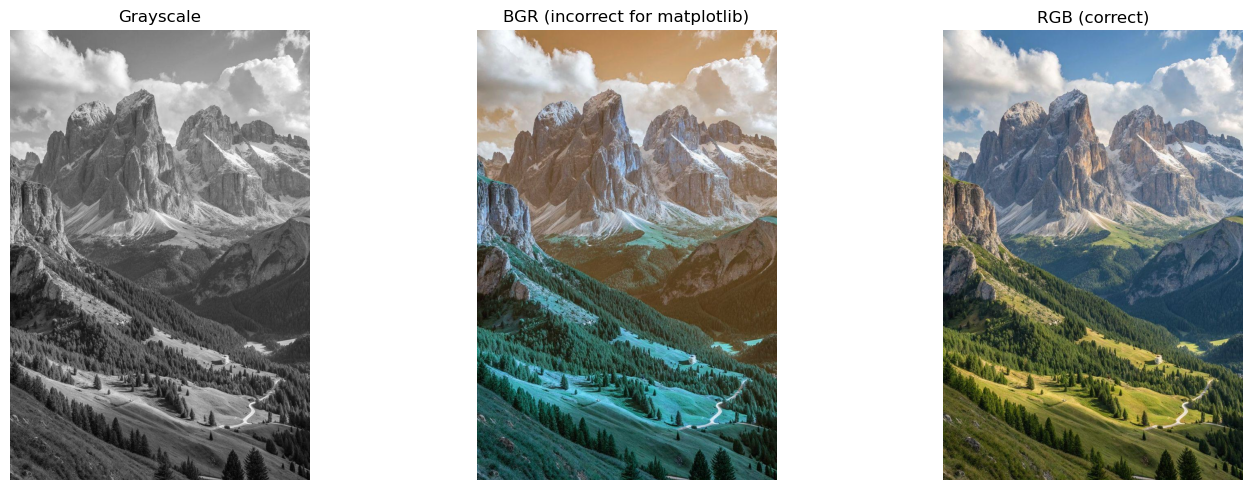

Grayscale shape: (1104, 736)
Color image shape: (1104, 736, 3)


In [10]:
img_gray = cv2.imread("/Users/230150/Downloads/nature.jpg", cv2.IMREAD_GRAYSCALE)

img_bgr = cv2.imread("/Users/230150/Downloads/nature.jpg", cv2.IMREAD_COLOR)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Grayscale')
axes[0].axis('off')

axes[1].imshow(img_bgr)
axes[1].set_title('BGR (incorrect for matplotlib)')
axes[1].axis('off')

axes[2].imshow(img_rgb)
axes[2].set_title('RGB (correct)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Grayscale shape: {img_gray.shape}")
print(f"Color image shape: {img_rgb.shape}")

Task 4.1: Image Processing

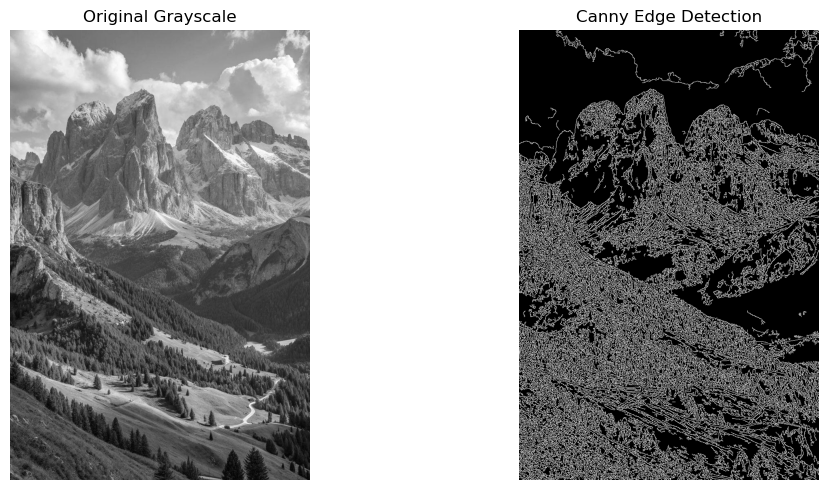

Edge image shape: (1104, 736)
Unique values in edge image: [  0 255]


In [11]:
edges = cv2.Canny(img_gray, threshold1=50, threshold2=150)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edge Detection')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Edge image shape: {edges.shape}")
print(f"Unique values in edge image: {np.unique(edges)}")

Part 5: Advanced Formats (Optional Bonus)

In [12]:
import glob
import cv2
import matplotlib.pyplot as plt
import os

In [14]:
path = "images/*.jpg"

# Get all image files
image_files = glob.glob(path)

if len(image_files) > 0:
    n_images = len(image_files)
    cols = min(3, n_images)
    rows = (n_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if n_images == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, file_path in enumerate(image_files):
        img = cv2.imread(file_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[idx].imshow(img_rgb)
        axes[idx].set_title(os.path.basename(file_path))
        axes[idx].axis('off')
    
    # Hide extra subplots
    for idx in range(n_images, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total images loaded: {n_images}")
else:
    print("No images found in the specified path.")


No images found in the specified path.


Reflection Questions.

Which library did you find easiest to use? Why?
Answer: Matplotlib was the easiest to use for basic image loading and display because it automatically returns NumPy arrays and integrates seamlessly with matplotlib's plotting functions. PIL is also very intuitive for simple image operations, but requires conversion to NumPy for numerical processing.

Which library would you choose for real-time video processing?
Answer: I would choose OpenCV for real-time video processing because:
- It has built-in video capture and processing capabilities
- Highly optimized C++ backend makes it very fast
- Extensive computer vision algorithms (object detection, tracking, etc.)
- Specifically designed for computer vision tasks
- Better performance compared to other libraries for real-time applications

What is the main difference between RGB and BGR?
Answer: The main difference is the order of color channels:
- RGB: Red-Green-Blue (standard format used by most libraries and displays)
- BGR: Blue-Green-Red (format used by OpenCV for historical reasons related to early computer graphics standards)

When displaying OpenCV images with matplotlib, we must convert BGR to RGB using cv2.cvtColor(), otherwise colors will appear incorrect (reds become blues and vice versa).